# HOMEWORK 13

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)


У цьому домашньому завданні ви збираєтеся перевірити набір даних GTSDB (Німецький тест виявлення дорожніх знаків). Набір даних містить зображення різних класів дорожніх знаків, які використовуються в Німеччині (і в усьому ЄС). Мета цього домашнього завдання полягає в тому, щоб виконати кроки, описані нижче, і реалізувати необхідний код.

Наприкінці, як завжди, буде кілька запитань, на які ви повинні відповісти. Крім того, останній розділ цього домашнього завдання є необов’язковим, і якщо ви вирішите його виконати, ви отримаєте додаткові бали :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

Перейдіть на офіційний сайт набору даних GTSRB ([посилання](https://benchmark.ini.rub.de/gtsrb_dataset.html)), щоб дізнатися більше про набір даних.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

Завантажте набір даних ([посилання](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) і розпакуйте його.

### Step 2

Для цього домашнього завдання ви будете працювати з навчальним набором. Перегляньте `Train.csv`, відкрийте його та подивіться, що він містить. Завантажте набір даних і побудуйте випадкові вибірки.

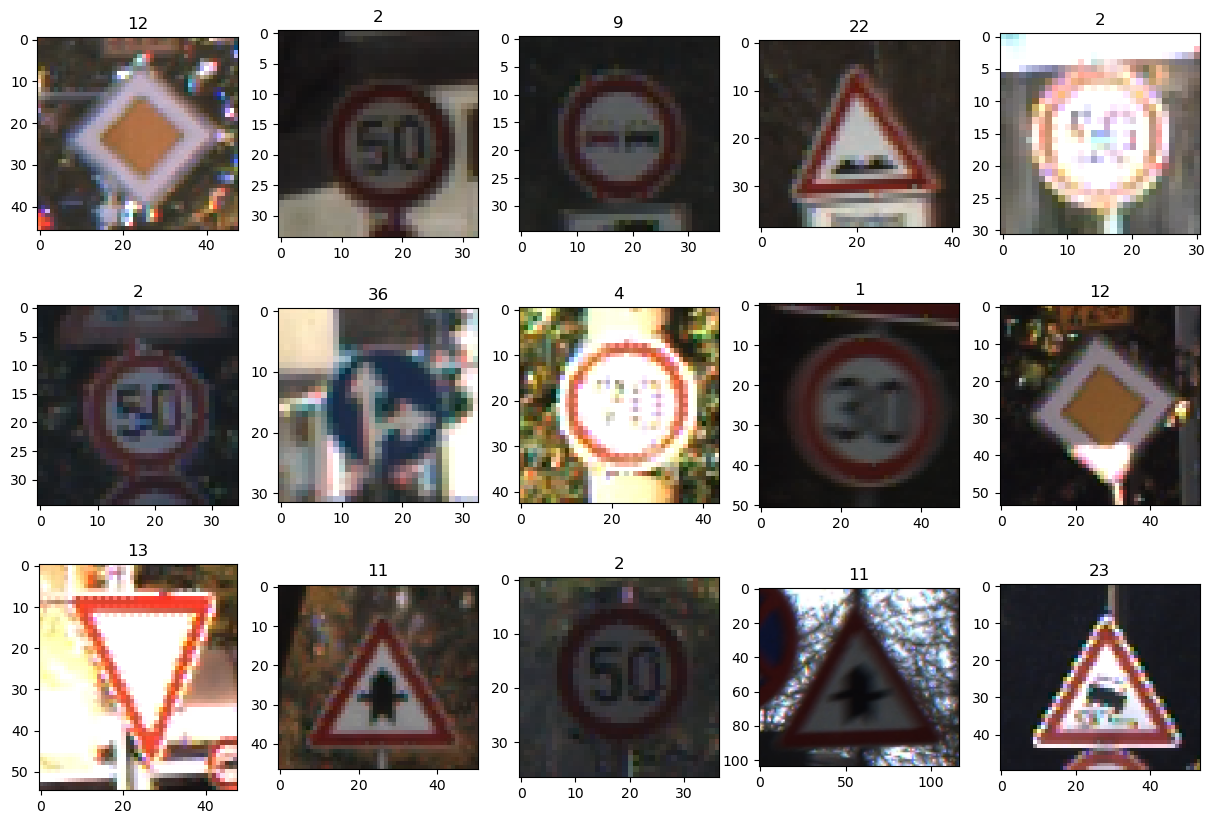

In [2]:
# Load the training labels
root = '../data/archive/' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data.index)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

Перевірте набір даних, обчисливши та побудувавши гістограму для кожного класу.

In [3]:
data.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

In [9]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId'].to_numpy()
unq = np.unique(ids)
print(unq)
print(len(unq))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
43


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

Обчисліть гістограму для кожного класу. Ви можете використовувати будь-який підхід, який хочете (наприклад, `numpy`). Також варто поглянути на функцію `Counter` з модуля `collections` ([посилання](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

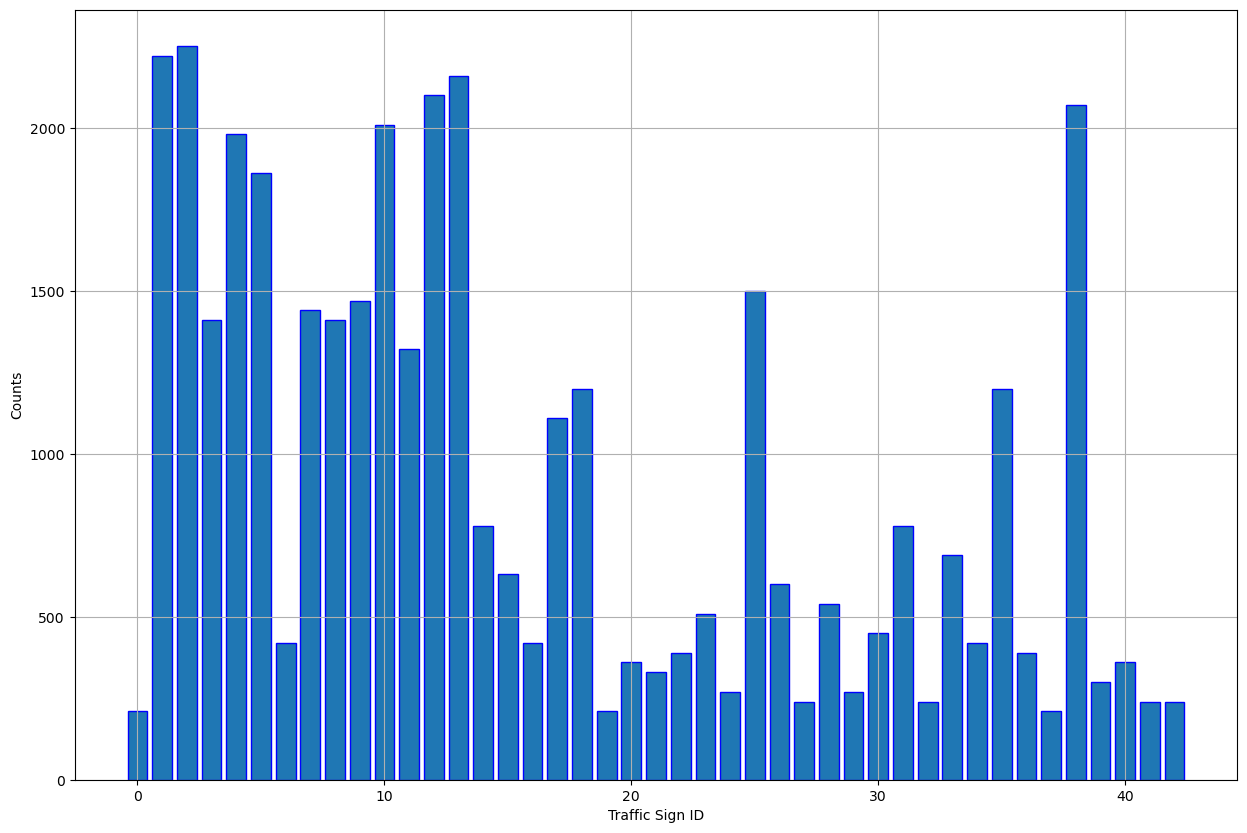

In [43]:
from collections import Counter
hist = Counter(ids)
print(hist)
plt.bar(hist.keys(), hist.values(), edgecolor='b'), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [28]:
vals = hist.values()
print(min(vals))
print(max(vals))

210
2250


### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

Будь ласка, дайте відповідь на наступні запитання:
* Чи вважаєте ви набір даних збалансованим? Якщо так, то чому? Якщо ні, то чому?
* Чи є якісь класи (значно) надмірно або недостатньо представлені?

<font color=#AAAAFF size=24><bold>Balanced</bold></font><br>
<font color=#AAAAFF>* Мінімальна кількість зображень в класі 210, при максимальній кількості 2250. Це є значним порушенням балансу. Варто очікувати, що класи з малою кількістю прикладів, нейронна мережа буде ігнорувати.</font><br>
<font color='green'>* The minimum number of images in a class is 210, with a maximum number of 2250. This is a significant imbalance. It should be expected that classes with a small number of examples will be ignored by the neural network.</font><br>
<br>
<font color=#AAAAFF size=24><bold>Under-represeneted</bold></font><br>
<font color=#AAAAFF>* Вважаю, що багато прикладів не буває. Але присутні класи, які на фоні інших є недостатньо представлені (менше 500 прикладів): </font><font color='red'>[30, 6, 16, 34, 22, 36, 20, 40, 21, 39, 24, 29, 27, 32, 41, 42, 0, 19, 37] </font><br>
<font color='green'>* I believe that there are not many examples. But there are classes that are not sufficiently represented against the background of others (less than 500 examples): </font><font color='red'>class_id = [30, 6, 16, 34, 22, 36, 20, 40, 21, 39, 24, 29, 27, 32, 41, 42, 0, 19, 37] </font><br>

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

### Необов'язково

Проведіть подальший аналіз набору даних і зробіть з нього певні висновки.

Підказка 1: на відміну від MNIST або CIFAR10, цей набір даних містить зображення з різною просторовою роздільною здатністю. Чи можемо ми щось сказати про розподіл роздільної здатності?
Підказка 2: як щодо розподілу яскравості? Чи є там заняття значно яскравіші за інші?

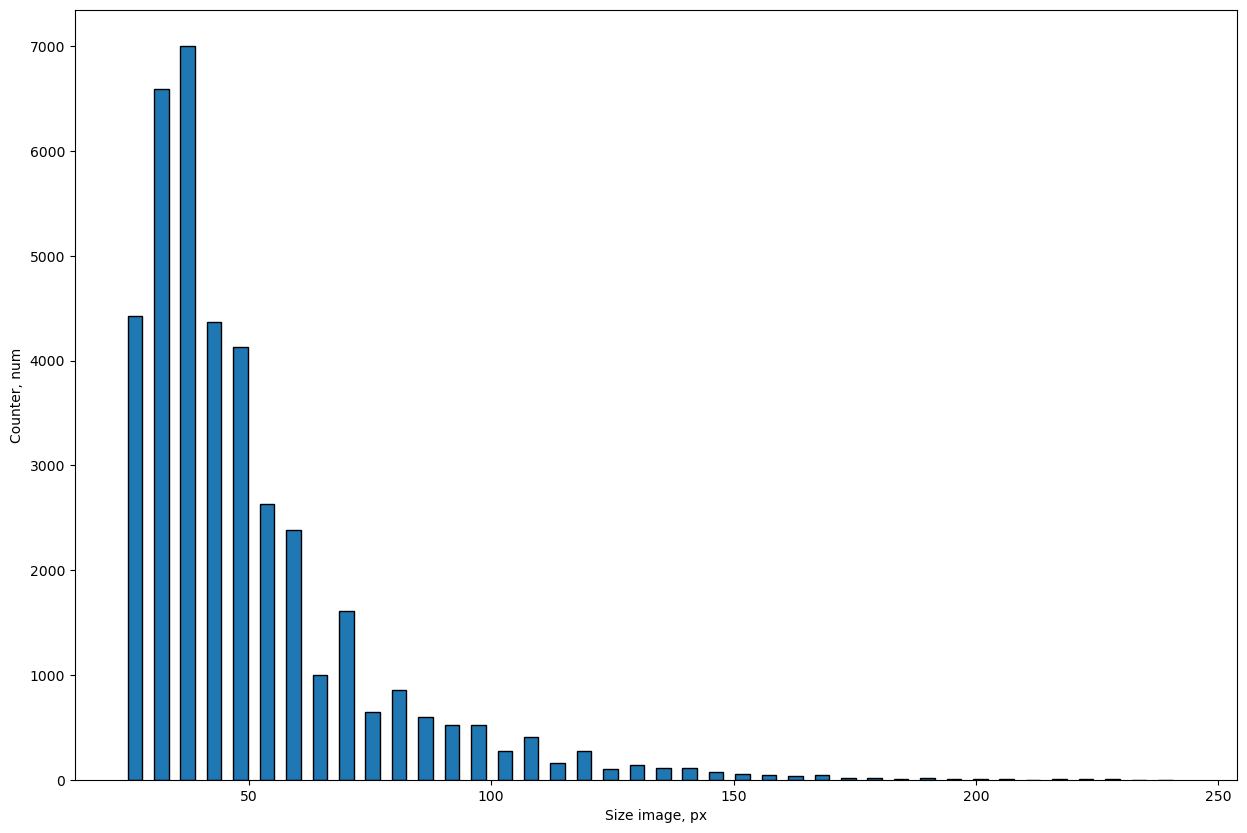

In [37]:
# Calculate statistic for samples resolutions
plt.hist(data['Width'].to_numpy(), bins=40, width=3, edgecolor='k'), plt.xlabel('Size image, px'), plt.ylabel('Counter, num')
plt.show()

<font color='blue' size=24><bold>Image Size Distribution</bold></font><br>
<font color=#AAAAFF>* За гістограмою розподілу розмірів зображень, можу зробити висновок, що зображення більші за 100px потрібно вилучати з тренування, або робити "resize" до розмірів від 75px. Проте зміна розміру може привести до спотворення фонових об'єктів. Малоймовірно що це важливо, але я б записав задачу для контроля можливих похибок, які пов'язані зі зменшенням фонових об'єктів.  </font><br>
<font color='green'>* According to the histogram of the distribution of image sizes, I can conclude that images larger than 100px should be removed from training, or "resized" to sizes from 75px. However, resizing can lead to distortion of background objects. It is unlikely that this is important, but I would write a task to control possible errors that are associated with the reduction of background objects. </font><br>

In [39]:
#Calculate brightness diapason distribution
brightnesses = np.zeros(shape=(num_samples), dtype=np.float32)

for idx in range(num_samples):
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to GRAY
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    high_brightness = img.max()
    low_brightness = img.min()
    brightnesses[idx] = high_brightness - low_brightness

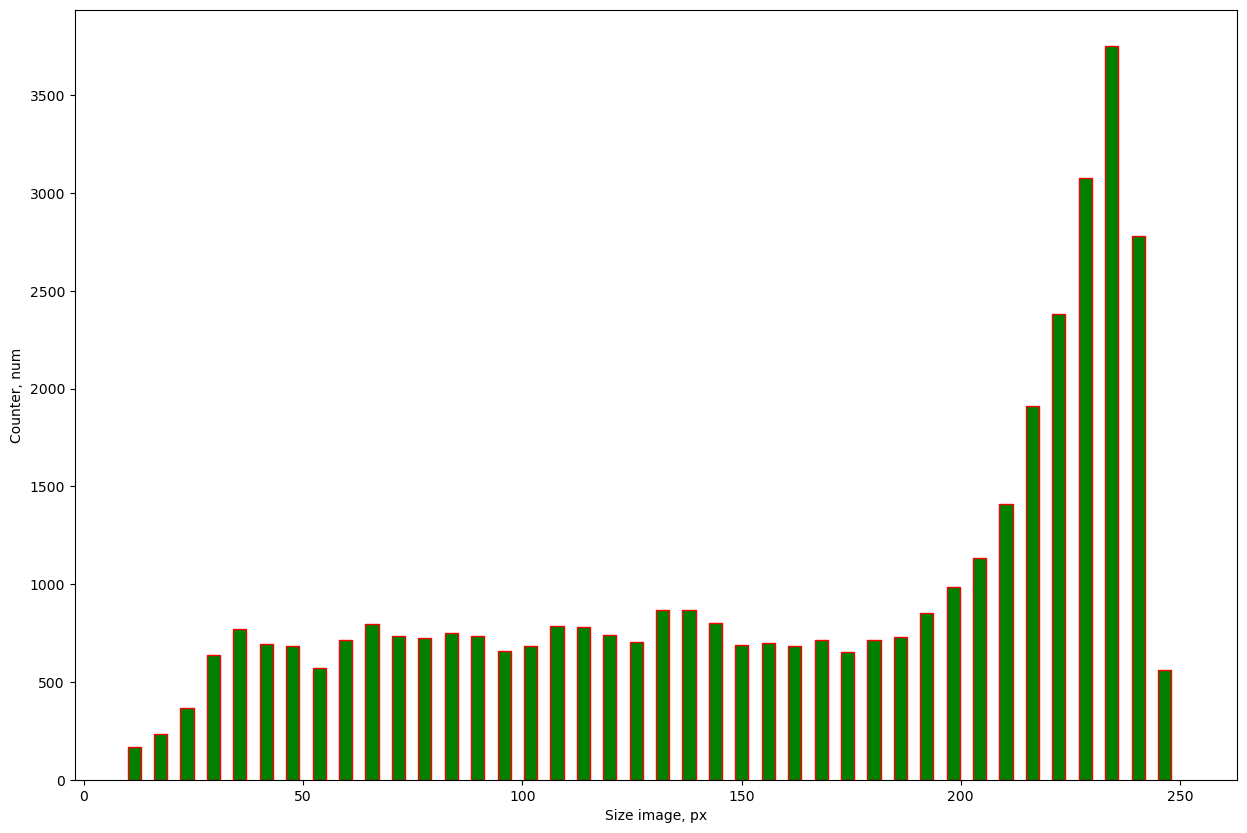

In [40]:
#Histogram of brightness ditribution:
plt.hist(brightnesses, bins=40, width=3, color='green', edgecolor='r'), plt.xlabel('Size image, px'), plt.ylabel('Counter, num')
plt.show()

In [42]:
#Low-contrast images count (if different is lower 30)
Lower = np.sum(brightnesses<30)
print(f'Low contrast in {100.0*Lower/len(brightnesses):.2f}% images.')

Low contrast in 2.18% images.


<font color='blue' size=24><bold>Contrast Images Distribution</bold></font><br>
<font color=#AAAAFF>* За гістограмою розподілу діапазону яскравості зображень, можу зробити висновок: Зображеннь з малою контрастністю недостатньо (гістограма падає). Зображень з високою контрасністю більше, ніж потрібно. Але проблема вирішується нормалізацією вхідних аних, коли КОЖНЕ зображення перетворюється в однаковий діапазон. Після нормалізації зображення матимуть однаковий контраст, але ті зображення, які були малоконтрасними, стануть сильно зашумлені.</font><br>
<font color='green'>* According to the histogram of the distribution of the image brightness range, I can conclude: Images with low contrast are not enough (the histogram falls). There are more high-contrast images than needed. But the problem is solved by normalizing the input images, where EVERY image is converted to the same range. After normalization, the images will have the same contrast, but those images that were low contrast will become very noisy. </font><br>